In [25]:
import torch as th
import torch.nn as nn
import numpy as np

from stable_baselines3.common.distributions import DiagGaussianDistribution, SquashedDiagGaussianDistribution

In [26]:
import seaborn as sb
import matplotlib
import matplotlib.pyplot as plt

sb.set_style('whitegrid')

FONTSIZE = 10
matplotlib.rcParams["figure.figsize"] = (10, 5)
matplotlib.rcParams["figure.dpi"] = 100
matplotlib.rcParams["figure.titlesize"] = FONTSIZE
matplotlib.rcParams["legend.fontsize"] = FONTSIZE
matplotlib.rcParams["xtick.labelsize"] = FONTSIZE
matplotlib.rcParams["ytick.labelsize"] = FONTSIZE
matplotlib.rcParams["axes.labelsize"] = FONTSIZE
matplotlib.rcParams["axes.titlesize"] = FONTSIZE
matplotlib.rcParams["savefig.bbox"] = "tight"
matplotlib.rcParams["savefig.pad_inches"] = 0.1
matplotlib.rcParams["lines.linewidth"] = 2
matplotlib.rcParams["axes.linewidth"] = 1.6

In [33]:
n = 100
diag = DiagGaussianDistribution(n)
sq = SquashedDiagGaussianDistribution(n)

mean = th.zeros(1,n) + 10
actions, log_probs = [], []
for i in range(30):
    action, log_prob = diag.log_prob_from_params(mean, th.full_like(mean, 1e-3*(3*i+1)).log())
    actions.append(action.squeeze().numpy())
    log_probs.append(log_prob.item())

actions = np.array(actions)

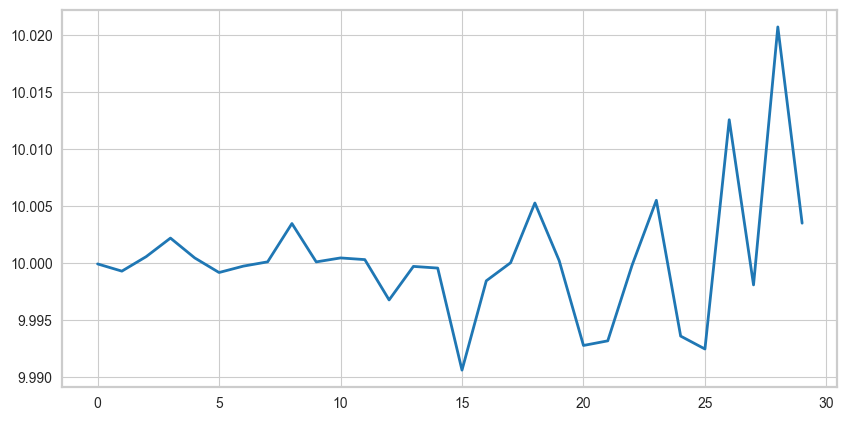

In [34]:
plt.plot(np.mean(actions, axis=1))
plt.show()

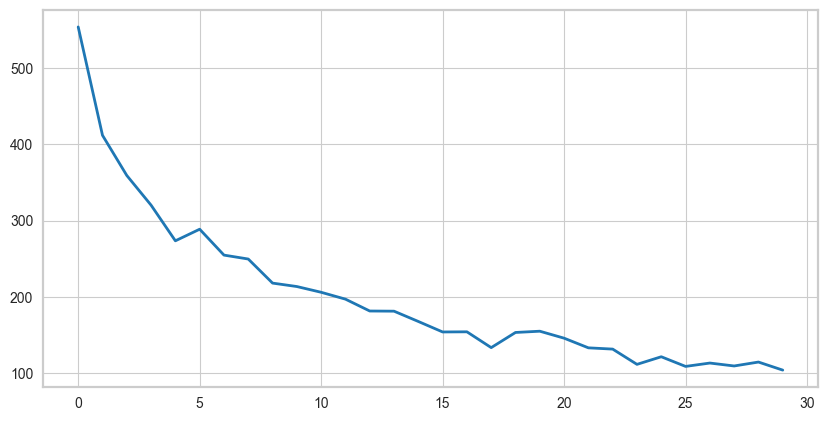

In [35]:
plt.plot(log_probs)
plt.show()

In [45]:
mean = th.zeros(1,n)
actions, log_probs = [], []
for i in range(30):
    action, log_prob = sq.log_prob_from_params(mean, th.full_like(mean, 1e-6*(6*i+1)).log())
    actions.append(action.squeeze().numpy())
    log_probs.append(log_prob.item())

actions = np.array(actions)

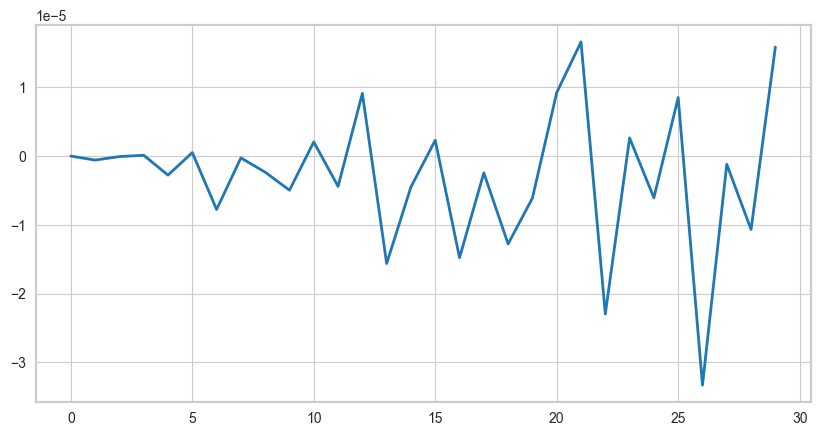

In [46]:
plt.plot(np.mean(actions, axis=1))
plt.show()

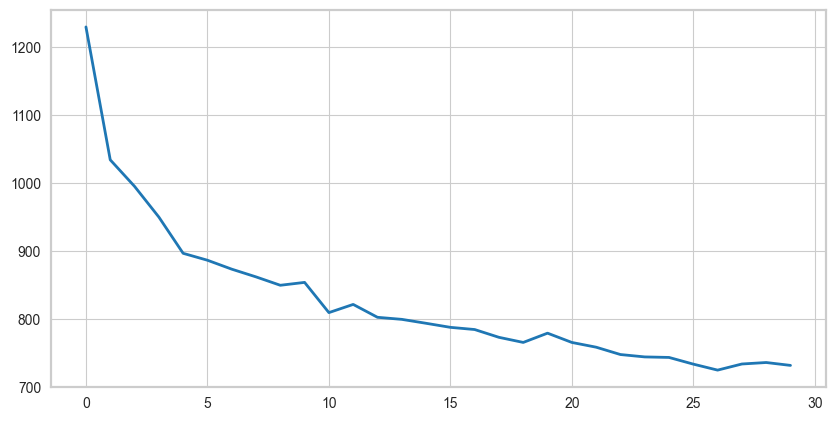

In [47]:
plt.plot(log_probs)
plt.show()